### **Imports**

In [ ]:
!pip install tika
import pandas as pd
import numpy as np
import io
from tika import parser

import matplotlib.pyplot as plt
import seaborn as sns

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32622 sha256=7036577d7f48cd1aefc4df555c19f22b53d650354ba95d48c09a2a4c97664fc1
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


### **Dados ANTAQ**

In [ ]:
# Dados anuais de todas as movimentações de conteineres em toneladas dos Terminal de Santos
df = pd.read_excel('TB9.1 - Dados-27_02_2024.xlsx')

df[['Ano', 'Nome do Terminal', 'Perfil da Carga', 'Nomenclatura Simplificada', 'Total de Movimentação Contêineres (Líquido)\nem toneladas (t)']]

,Ano,Nome do Terminal,Perfil da Carga,Nomenclatura Simplificada,Total de Movimentação Contêineres (Líquido)\nem toneladas (t)
0,2023,DP World Santos,Carga Conteinerizada,Contêineres,5.84
1,2023,DP World Santos,Carga Conteinerizada,Contêineres,140.17
2,2023,DP World Santos,Carga Conteinerizada,Contêineres,25.30
3,2023,DP World Santos,Carga Conteinerizada,Contêineres,19.10
4,2023,DP World Santos,Carga Conteinerizada,Contêineres,20.03
...,...,...,...,...,...
10463,2023,Santos | Ecoporto Santos S/A,Carga Conteinerizada,Contêineres,0.00
10464,2023,Santos | Ecoporto Santos S/A,Carga Conteinerizada,Contêineres,29.60
10465,2023,Santos | Libra Terminais S/A,Carga Conteinerizada,Contêineres,27.72
10466,2023,Santos | Libra Terminais S/A,Carga Conteinerizada,Contêineres,0.00


In [ ]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd
df = pd.read_excel('GR1.6 - Evolução da Movimentação-2_27_2024.xlsx')

fig = go.Figure([go.Scatter(x=df['Mês'], y=df['Peso Carga Bruta'])])
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'GR1.6 - Evolução da Movimentação-2_27_2024.xlsx'

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel('GR1.6 - Evolução da Movimentação-2_27_2024.xlsx')
df['Peso Carga Bruta'] = df['Peso Carga Bruta'].astype(np.int64)
df

FileNotFoundError: [Errno 2] No such file or directory: 'GR1.6 - Evolução da Movimentação-2_27_2024.xlsx'

<ipython-input-19-76dc4f52b588>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Axes: xlabel='Mês'>

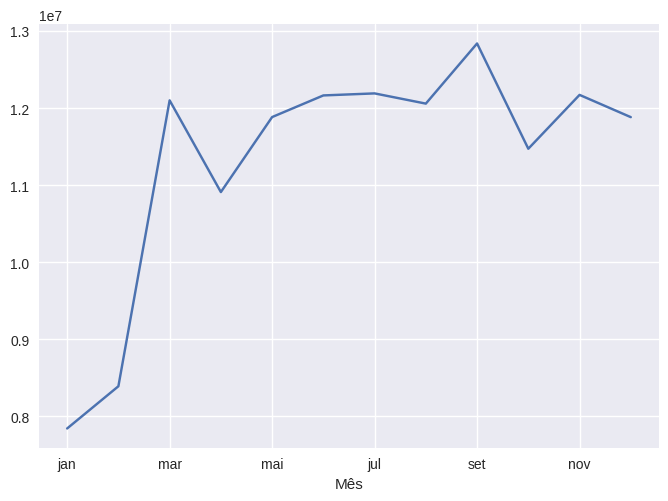

In [ ]:
# Distribuição de Peso de Carga Bruta durante todos os meses.
import matplotlib.pyplot as plt
import seaborn
plt.style.use('seaborn')

df.set_index(df['Mês'])['Peso Carga Bruta'].plot()

Text(0.5, 1.0, 'Média exponencial ponderada')

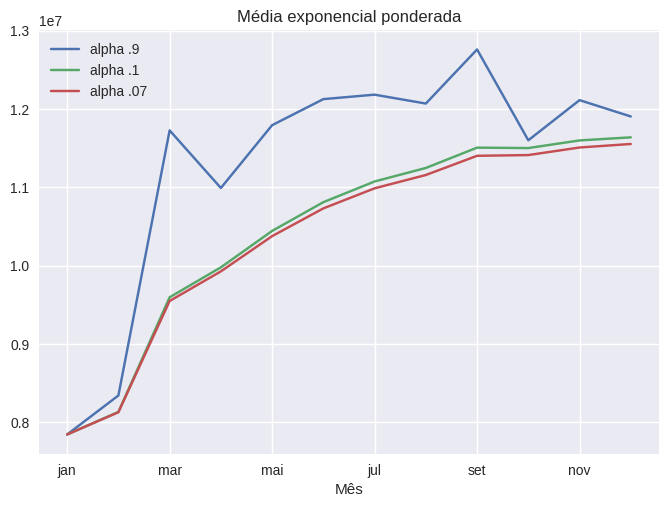

In [ ]:
# Calculo de média exponencial ponderada
df.set_index(df['Mês'])['Peso Carga Bruta'].ewm(alpha=.9).mean().plot(label='alpha .9')
df.set_index(df['Mês'])['Peso Carga Bruta'].ewm(alpha=.1).mean().plot(label='alpha .1')
df.set_index(df['Mês'])['Peso Carga Bruta'].ewm(alpha=.07).mean().plot(label='alpha .07')
plt.legend()
plt.title('Média exponencial ponderada')

Text(0.5, 1.0, 'Média Móvel')

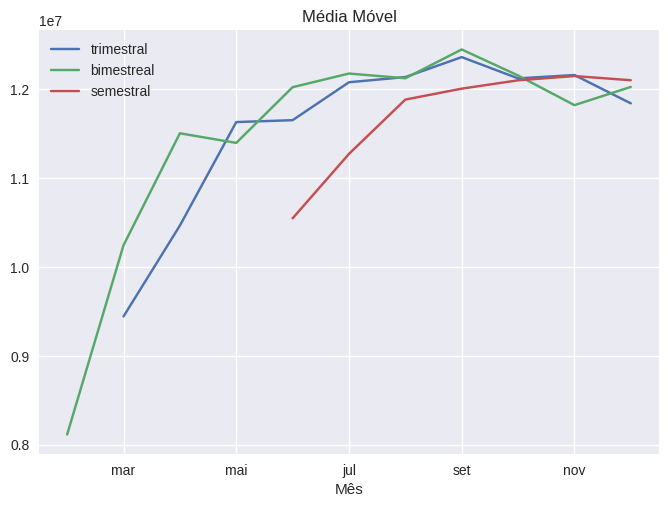

In [ ]:
# Calculo da média móvel da distribuição do Peso de Carga Bruta dividida em Bimestre, Trimestre e Semestre
df.set_index(df['Mês'])['Peso Carga Bruta'].rolling(3).mean().plot(label='trimestral')
df.set_index(df['Mês'])['Peso Carga Bruta'].rolling(2).mean().plot(label='bimestreal')
df.set_index(df['Mês'])['Peso Carga Bruta'].rolling(6).mean().plot(label='semestral')
plt.legend()
plt.title('Média Móvel')

Text(0.5, 1.0, 'Média Móvel x Média xponencia ponderada')

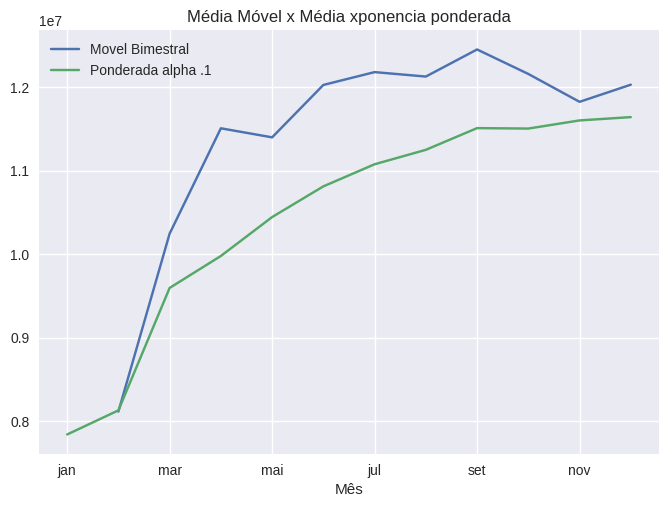

In [ ]:
# Correlação da movimentação de Carga Bruta no porto de Santos entre a média móvel bimestreal, com a média exponêncial ponderada
df.set_index(df['Mês'])['Peso Carga Bruta'].rolling(2).mean().plot(label='Movel Bimestral')
df.set_index(df['Mês'])['Peso Carga Bruta'].ewm(alpha=.1).mean().plot(label='Ponderada alpha .1')
plt.legend()
plt.title('Média Móvel x Média xponencia ponderada')

### Extraindo dados do PDF

In [14]:
!pip install pdfplumber
import pdfplumber

pdf = pdfplumber.open('Serviços - CETESB.pdf')
page = pdf.pages[0]

text = page.extract_text().splitlines() # splitlines() para pegar linha por linha

for i, l in enumerate(text): # Enumerate para contabilizar número de linhas do text
  print(f"({i}): {l}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.4 MB/s eta 0:00:00
(0): Sistema de Informação de Qualidade do Ar
(1): Relatório da Distribuição da Qualidade
(2): Tipo de Rede: Automático Data Inicial: 01/01/2020 Data Final: 01/01/2024
(3): UGRHI: 7 - BAIXADA SANTISTA Município: Santos Estação: TODOS
(4): NO2 (Dióxido de MP2.5 (Partículas Inaláveis
(5): MP10 (Partículas Inaláveis) SO2 (Dióxido de Enxofre) O3 (Ozônio)
(6): MÊS NU NU Nitrogênio) NU Finas) NU NUN. Dias
(7): N1 N2 N3 N4 N5 N1 N2 N3 N4 N5 N1 N2 N3 N4 N5 N1 N2 N3 N4 N5 N1 N2 N3 N4 N5
(8): Janeiro 125 0 0 0 0 0 101 0 0 0 0 0 119 0 0 0 0 0 120 0 0 0 0 0 120 5 0 0 0 0 0
(9): Fevereiro 113 0 0 0 0 0 98 0 0 0 0 0 113 0 0 0 0 0 104 0 0 0 0 0 111 2 0 0 0 0 0
(10): Março 124 0 0 0 0 0 108 0 0 0 0 0 113 0 0 0 0 0 118 0 0 0 0 0 123 1 0 0 0 0 0
(11): Abril 119 1 0 0 0 

In [ ]:
table = ""

for i in range(8, 21):
   table += f"{text[i].replace(' ', '|')}\n"


with open('Dados CETESB.txt', 'w') as f:
  print(table, file=f)

data = pd.read_csv('Dados CETESB.txt', sep="|", header=None)
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NU",
                "N1", "N2", "N3", "N4", "N5", "NU",
                "N1", "N2", "N3", "N4", "N5", "NU",
                "N1", "N2", "N3", "N4", "N5", "NU",
                "N1", "N2", "N3", "N4", "N5", "NUM.", "Dias",]
data


,Mês,N1,N2,N3,N4,N5,NU,N1,N2,N3,...,N4,N5,NU,N1,N2,N3,N4,N5,NUM.,Dias
0,Janeiro,125,0,0,0,0,0,101,0,0,...,0,0,0,120,5,0,0,0,0,0
1,Fevereiro,113,0,0,0,0,0,98,0,0,...,0,0,0,111,2,0,0,0,0,0
2,Março,124,0,0,0,0,0,108,0,0,...,0,0,0,123,1,0,0,0,0,0
3,Abril,119,1,0,0,0,0,110,0,0,...,0,0,0,120,0,0,0,0,0,0
4,Maio,99,25,0,0,0,0,122,0,0,...,0,0,0,124,0,0,0,0,0,0
5,Junho,77,28,1,0,0,1,111,0,0,...,0,0,0,113,0,0,0,0,0,1
6,Julho,87,29,0,0,0,0,119,0,0,...,0,0,0,110,0,0,0,0,0,0
7,Agosto,110,14,0,0,0,0,92,0,0,...,0,0,0,118,3,0,0,0,0,0
8,Setembro,112,6,1,0,0,1,112,0,0,...,0,0,0,120,0,0,0,0,0,1
9,Outubro,123,0,0,0,0,0,106,0,0,...,0,0,0,123,1,0,0,0,0,0


In [15]:
data.style.use('seaborn')

df.set_index(df['Mês'])['N1'].plot()

NameError: name 'data' is not defined

### Relatório MP10 (Partículas Inaláveis)

In [ ]:
# Dados MP10
dados_mp10 = ""

x = ""

for i in range(8, 21):

  dados_formatados = f"{str(text[i].split()[1:7]).replace('[', '').replace(']', '').replace(',', '|')}"
  dados_formatados = dados_formatados.replace("'", "")
  dados_formatados = dados_formatados.replace(" ", "")

  dados_mp10 += f"{text[i].split()[0]}|{dados_formatados}\n"

with open("dados_formatados_CETESB.txt", "w") as f:
  print(dados_mp10, file=f)

data = pd.read_csv('dados_formatados_CETESB.txt', sep="|", header=None, )
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NUM"]
data.style.set_caption("MP10 (Partículas Inaláveis")

,Mês,N1,N2,N3,N4,N5,NUM
0,Janeiro,125,0,0,0,0,0
1,Fevereiro,113,0,0,0,0,0
2,Março,124,0,0,0,0,0
3,Abril,119,1,0,0,0,0
4,Maio,99,25,0,0,0,0
5,Junho,77,28,1,0,0,1
6,Julho,87,29,0,0,0,0
7,Agosto,110,14,0,0,0,0
8,Setembro,112,6,1,0,0,1
9,Outubro,123,0,0,0,0,0


### Relatório SO2 (Dióxido de Enxofre)

In [ ]:
# so2
dados_so2 = ""

x = ""

for i in range(8, 21):

  dados_formatados = f"{str(text[i].split()[7:13]).replace('[', '').replace(']', '').replace(',', '|')}"
  dados_formatados = dados_formatados.replace("'", "")
  dados_formatados = dados_formatados.replace(" ", "")

  dados_so2 += f"{text[i].split()[0]}|{dados_formatados}\n"

with open("dados_formatados_CETESB.txt", "w") as f:
  print(dados_so2, file=f)

data = pd.read_csv('dados_formatados_CETESB.txt', sep="|", header=None, )
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NUM"]
data.style.set_caption("SO2 (Dióxido de Enxofre)")

,Mês,N1,N2,N3,N4,N5,NUM
0,Janeiro,101,0,0,0,0,0
1,Fevereiro,98,0,0,0,0,0
2,Março,108,0,0,0,0,0
3,Abril,110,0,0,0,0,0
4,Maio,122,0,0,0,0,0
5,Junho,111,0,0,0,0,0
6,Julho,119,0,0,0,0,0
7,Agosto,92,0,0,0,0,0
8,Setembro,112,0,0,0,0,0
9,Outubro,106,0,0,0,0,0


### Relatorio NO2 (Dióxido de Nitrogênio)

In [ ]:
# Dados NO2
dados_no2 = ""

x = ""

for i in range(8, 21):

  dados_formatados = f"{str(text[i].split()[13:19]).replace('[', '').replace(']', '').replace(',', '|')}"
  dados_formatados = dados_formatados.replace("'", "")
  dados_formatados = dados_formatados.replace(" ", "")

  dados_no2 += f"{text[i].split()[0]}|{dados_formatados}\n"

with open("dados_formatados_CETESB.txt", "w") as f:
  print(dados_no2, file=f)

data = pd.read_csv('dados_formatados_CETESB.txt', sep="|", header=None, )
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NUM"]
data.style.set_caption("NO2 (Dióxido de Nitrogênio)")

,Mês,N1,N2,N3,N4,N5,NUM
0,Janeiro,119,0,0,0,0,0
1,Fevereiro,113,0,0,0,0,0
2,Março,113,0,0,0,0,0
3,Abril,107,0,0,0,0,0
4,Maio,124,0,0,0,0,0
5,Junho,120,0,0,0,0,0
6,Julho,124,0,0,0,0,0
7,Agosto,124,0,0,0,0,0
8,Setembro,120,0,0,0,0,0
9,Outubro,124,0,0,0,0,0


### Relatório MP2.5 (Partículas Inaláveis Finas)

In [ ]:
# Dados MP2.5
dados_mp25 = ""

x = ""

for i in range(8, 21):

  dados_formatados = f"{str(text[i].split()[19:25]).replace('[', '').replace(']', '').replace(',', '|')}"
  dados_formatados = dados_formatados.replace("'", "")
  dados_formatados = dados_formatados.replace(" ", "")

  dados_mp25 += f"{text[i].split()[0]}|{dados_formatados}\n"

with open("dados_formatados_CETESB.txt", "w") as f:
  print(dados_mp25, file=f)

data = pd.read_csv('dados_formatados_CETESB.txt', sep="|", header=None, )
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NUM"]
data.style.set_caption("MP2.5 (Partículas Inaláveis Finas")

,Mês,N1,N2,N3,N4,N5,NUM
0,Janeiro,120,0,0,0,0,0
1,Fevereiro,104,0,0,0,0,0
2,Março,118,0,0,0,0,0
3,Abril,120,0,0,0,0,0
4,Maio,121,3,0,0,0,0
5,Junho,110,6,0,0,0,0
6,Julho,105,19,0,0,0,0
7,Agosto,113,10,0,0,0,0
8,Setembro,113,2,0,0,0,0
9,Outubro,121,0,0,0,0,0


### Relatório O3 (Ozônio)

In [ ]:
# Dados O3 (Ozônio)
dados_o3 = ""

x = ""

for i in range(8, 21):

  dados_formatados = f"{str(text[i].split()[25:31]).replace('[', '').replace(']', '').replace(',', '|')}"
  dados_formatados = dados_formatados.replace("'", "")
  dados_formatados = dados_formatados.replace(" ", "")

  dados_o3 += f"{text[i].split()[0]}|{dados_formatados}\n"

with open("dados_formatados_CETESB.txt", "w") as f:
  print(dados_o3, file=f)

data = pd.read_csv('dados_formatados_CETESB.txt', sep="|", header=None, )
data.columns = ["Mês", "N1", "N2", "N3", "N4", "N5", "NUM"]
data.style.set_caption("O3 (Ozônio)")

,Mês,N1,N2,N3,N4,N5,NUM
0,Janeiro,120,5,0,0,0,0
1,Fevereiro,111,2,0,0,0,0
2,Março,123,1,0,0,0,0
3,Abril,120,0,0,0,0,0
4,Maio,124,0,0,0,0,0
5,Junho,113,0,0,0,0,0
6,Julho,110,0,0,0,0,0
7,Agosto,118,3,0,0,0,0
8,Setembro,120,0,0,0,0,0
9,Outubro,123,1,0,0,0,0
